In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
import plotly.graph_objects as go


In [116]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data_position.xlsx"

df = pd.read_excel(path_file, sheet_name='yaw0pitch0roll0')
df1 = pd.read_excel(path_file, sheet_name='yaw0pitch20roll0')
df2 = pd.read_excel(path_file, sheet_name='yaw0pitch20roll10')
df3 = pd.read_excel(path_file, sheet_name='yaw90pitch0roll0')

# print(df1)

<>:1: SyntaxWarning:

invalid escape sequence '\P'

<>:1: SyntaxWarning:

invalid escape sequence '\P'

C:\Users\Quan\AppData\Local\Temp\ipykernel_10652\3807475661.py:1: SyntaxWarning:

invalid escape sequence '\P'



In [114]:
x_calculated = df.loc[:, 'x1']
y_calculated = df.loc[:, 'y1']
z_calculated = df.loc[:, 'z1']
x_samples = df.loc[:, 'X1']
y_samples = df.loc[:, 'Y1']
z_samples = df.loc[:, 'Z1']
# print(z_calculated)

x1_calculated = df1.loc[:, 'x2']
y1_calculated = df1.loc[:, 'y2']
z1_calculated = df1.loc[:, 'z2']
x1_samples = df1.loc[:, 'X2']
y1_samples = df1.loc[:, 'Y2']
z1_samples = df1.loc[:, 'Z2']


x2_calculated = df2.loc[:, 'x3']
y2_calculated = df2.loc[:, 'y3']
z2_calculated = df2.loc[:, 'z3']
x2_samples = df2.loc[:, 'X3']
y2_samples = df2.loc[:, 'Y3']
z2_samples = df2.loc[:, 'Z3']

x3_calculated = df3.loc[:, 'x4']
y3_calculated = df3.loc[:, 'y4']
z3_calculated = df3.loc[:, 'z4']
x3_samples = df3.loc[:, 'X4']
y3_samples = df3.loc[:, 'Y4']
z3_samples = df3.loc[:, 'Z4']



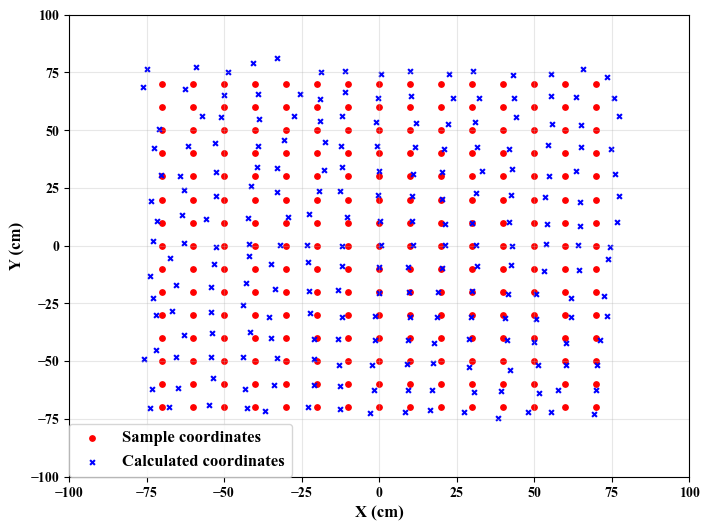

In [148]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_samples, color='red', marker='o',s=15, label='Sample coordinates')
plt.scatter(x_calculated, y_calculated, color='blue', marker='x',s=12, label='Calculated coordinates')

plt.xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize=12)
plt.ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize=12)
plt.legend(loc=(0, 0), fontsize=12)
plt.grid(True, alpha=0.3)

# Set axis limits to match the example
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.savefig('c1_2D', dpi = 300) 

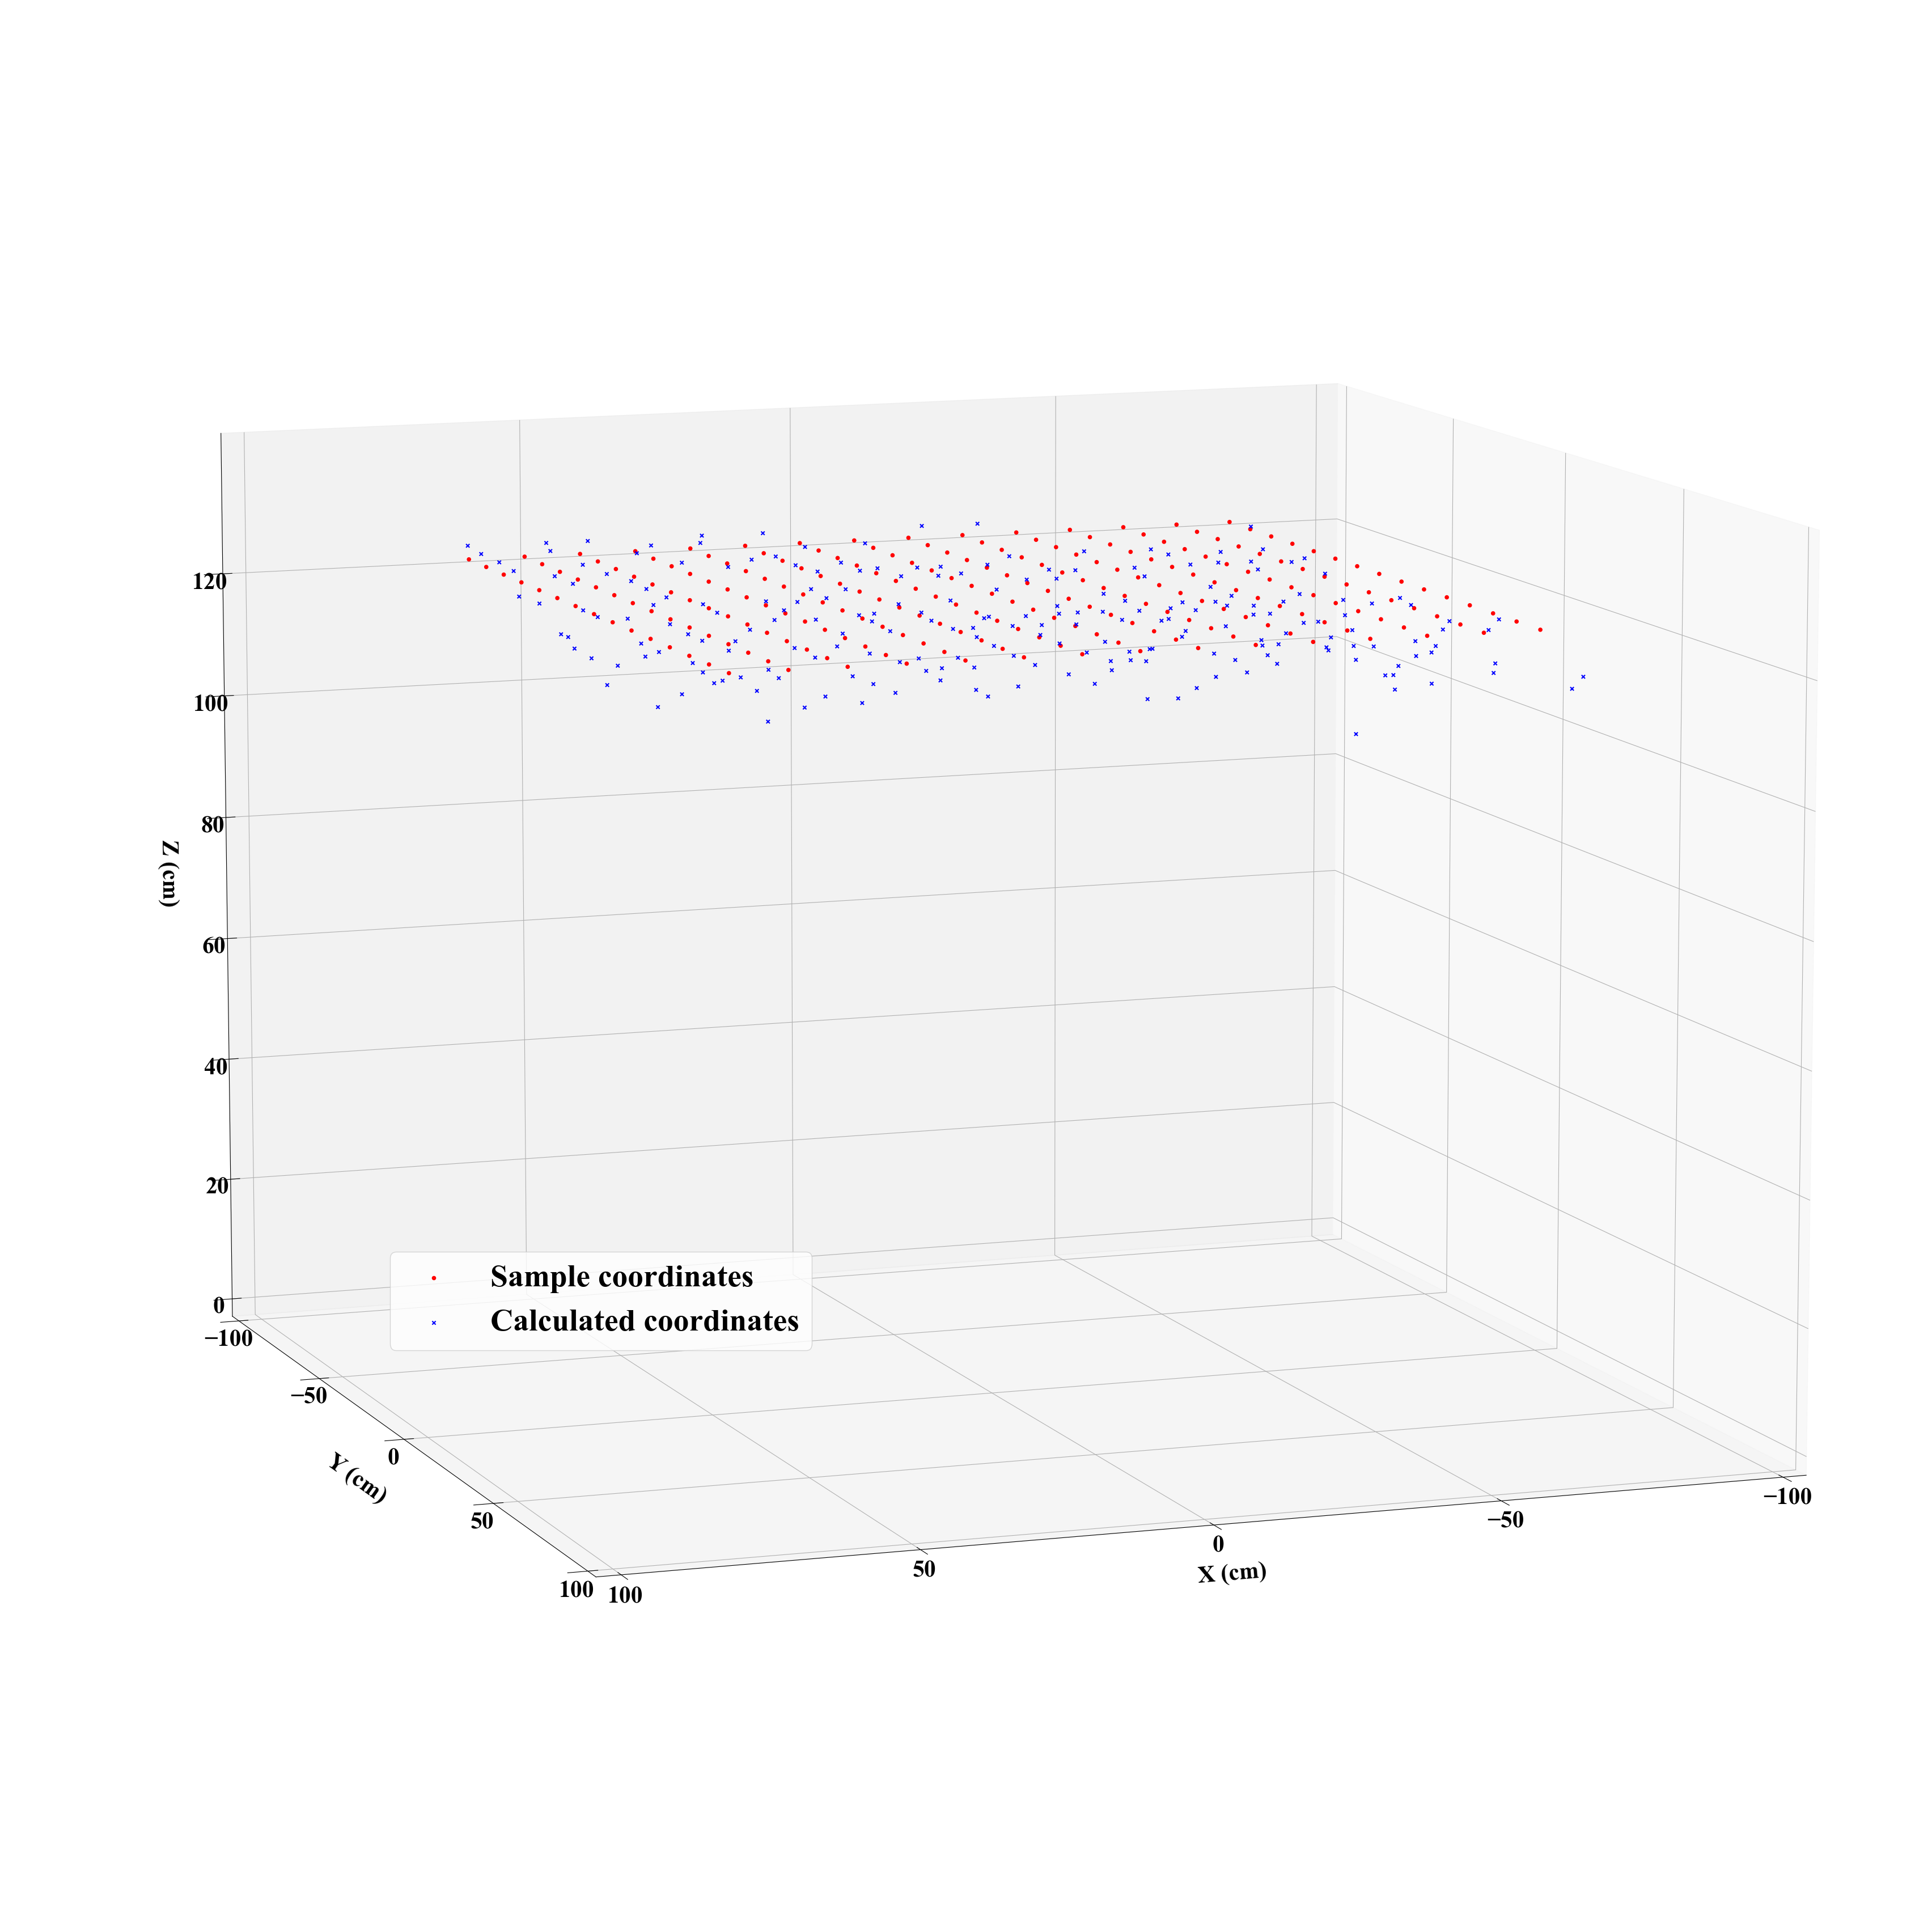

In [163]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

fig = plt.figure(figsize=(60, 44))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='r', marker='o', s= 20, label = 'Sample coordinates', alpha = 1)
ax.scatter(x_calculated, y_calculated, z_calculated, c='b', marker='x', s= 20, label = 'Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize = 30, labelpad=30)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize = 30, labelpad=30)
ax.set_zlabel('Z (cm)', fontdict={'weight': 'bold'}, fontsize = 30, labelpad=30)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(0, 140)
ax.grid(True)
ax.legend(loc=(0.2, 0.3), fontsize = 40)

# Adjust view angle
ax.view_init(elev=10, azim=70)

ax.set_xticks([-100, -50, 0, 50, 100])
ax.set_yticks([-100, -50, 0, 50, 100])
ax.set_zticks([0, 20, 40, 60, 80, 100, 120])
ax.tick_params(axis='x', labelsize=30)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=30)  # Kích thước chữ cho trục Y
ax.tick_params(axis='z', labelsize=30)  # Kích thước chữ cho trục Z

# Remove top and right spines
# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# plt.show()
fig.savefig('c1_3D', dpi = 300, bbox_inches='tight') 

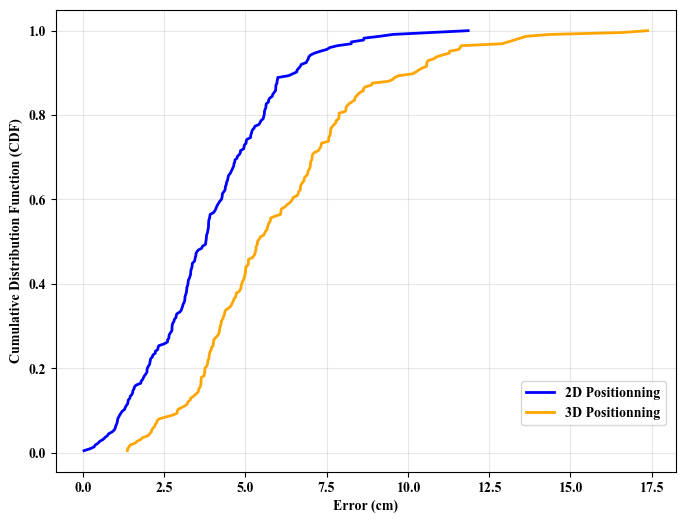

In [132]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

delta_xy = df.loc[:, 'delta_xy1']
delta_xyz = df.loc[:, 'delta_xyz1']


# print(delta_xy)
data_sorted = np.sort(delta_xy)
data_xyz_sorted = np.sort(delta_xyz)


# print(data_sorted)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
cdf2 = np.arange(1, len(data_xyz_sorted) + 1) / len(data_xyz_sorted)


# Vẽ biểu đồ CDF
fig = plt.figure(figsize=(8, 6))


# Vẽ CDF
plt.plot(data_sorted, cdf, linestyle='-', color='blue', linewidth = 2, label = '2D Positionning')

plt.plot(data_xyz_sorted, cdf2, linestyle='-', color='orange', linewidth = 2, label = '3D Positionning')

# Thêm nhãn và tiêu đề
plt.xlabel('Error (cm)', fontdict={'weight': 'bold'})
plt.ylabel('Cumulative Distribution Function (CDF)', fontdict={'weight': 'bold'})

plt.legend(loc = (0.75, 0.1))
# Hiển thị lưới
plt.grid(True, alpha=0.3)

# Hiển thị biểu đồ
plt.show()
fig.savefig('c1_CDF',dpi = 1000)
